## An attempt to apply non-circulant Richardson Lucy deconvolution to images from a listserv question

This notebook modifies the 'test_libs' deconvolution notebook, presented as part of the Napari workshop of I2K-2022 to processes the images [from this question](https://forum.image.sc/t/deconvolution-minimizing-edge-artifacts/69828) using CLIJ non-circulant deconvolution.

## Setup Environment

These instructions only work for Windows or Linux.  If you are interested helping compile clij2-fft python distribution for Mac or Mac-M1 please reach out, perhaps by opening a listserv topic. 

    conda create --name decon-napari python=3.9
    conda activate decon-napari
    pip install devbio-napari
    pip install git+https://github.com/True-North-Intelligent-Algorithms/tnia-python
    pip install --index-url https://test.pypi.org/simple/ --no-deps clij2-fft

Mac-users may also need to install this:

    conda install -c conda-forge ocl_icd_wrapper_apple

Linux users may also need to install this:

    conda install -c conda-forge ocl-icd-system

## Open and view images

It is always a good idea to look at 3D representations of objects, for example XY, ZY and XZ slice view is informative, as is loading the images into a 3D viewer such as napari.

(20, 512, 512)
(50, 100, 100)


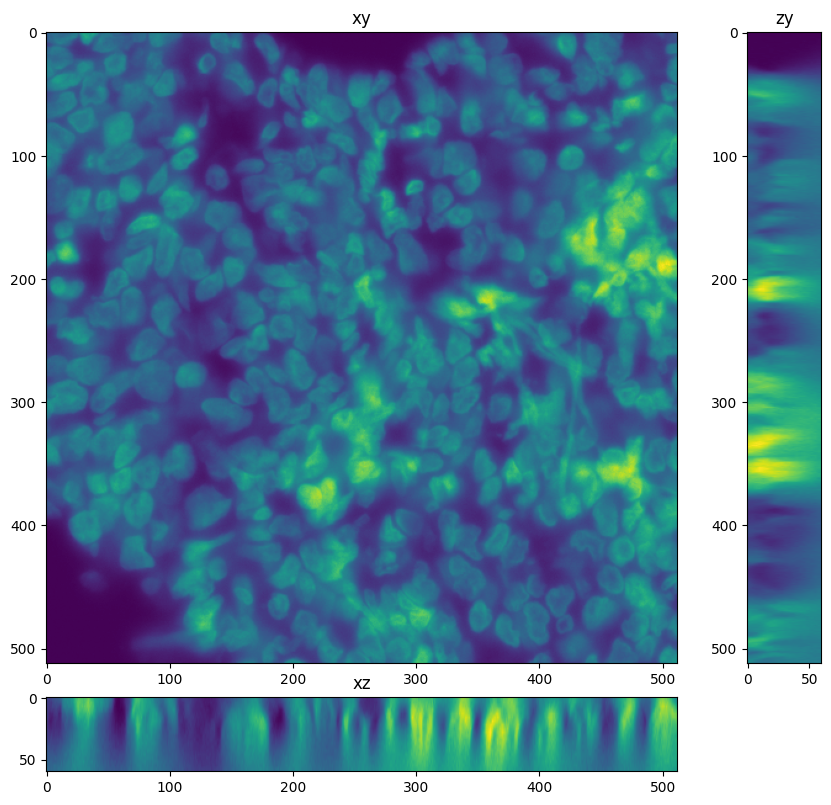

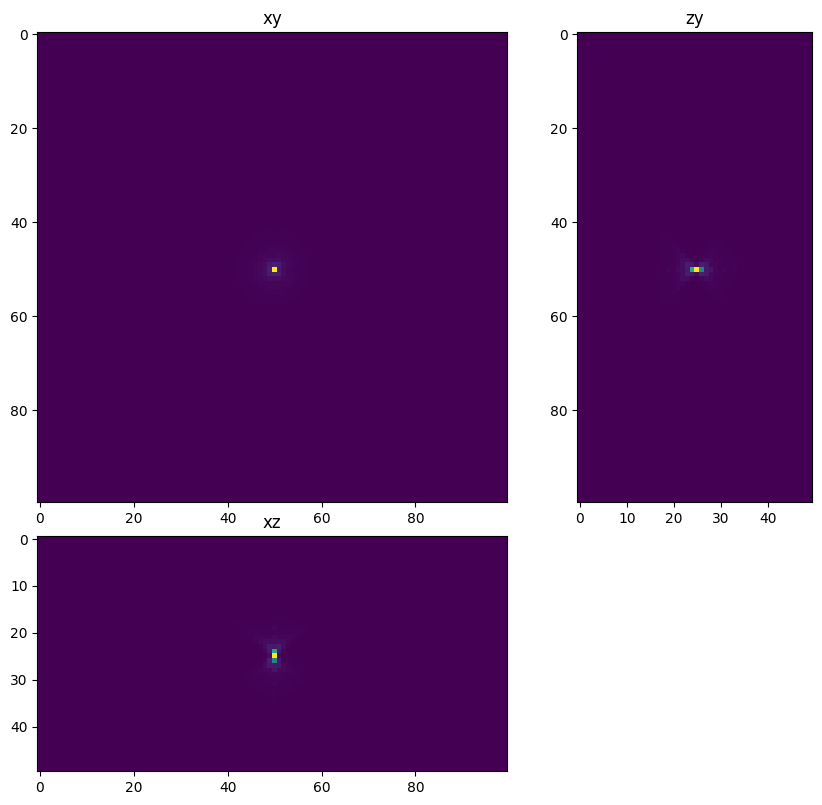

In [1]:
from skimage.io import imread
from tnia.nd.ndutil import centercrop

im_path='D:/images/i2k2022/deconvolution/jlake_listserv_july21/'
im_name='todeconv.tif'
psf_name='todeconv-psf1.tif'

im=imread(im_path+im_name)
psf=imread(im_path+psf_name)

# note we crop the PSF laterally in this case to improve speed.  There is little information far from the center of the PSF image
psf=centercrop(psf,[psf.shape[0],100,100])

print(im.shape)
print(psf.shape)

im=im.astype('float32')
psf=psf.astype('float32')

from tnia.plotting.projections import show_xyz_max, show_xyz_slice

fig=show_xyz_slice(im,int(im.shape[2]/2), int(im.shape[1]/2), int(im.shape[0]/2),1,3)
fig=show_xyz_max(psf)

In [2]:
from clij2fft.richardson_lucy import richardson_lucy_nc
decon_clij2_75=richardson_lucy_nc(im,psf,75,0)
decon_clij2_150=richardson_lucy_nc(im,psf,150,0)
decon_clij2_300=richardson_lucy_nc(im,psf,300,0)


get lib
get lib
get lib


In [3]:
import RedLionfishDeconv as rl
decon_rlf_75=rl.doRLDeconvolutionFromNpArrays(im, psf, niter=75, method='gpu', resAsUint8=False )
decon_rlf_150=rl.doRLDeconvolutionFromNpArrays(im, psf, niter=150, method='gpu', resAsUint8=False )
decon_rlf_300=rl.doRLDeconvolutionFromNpArrays(im, psf, niter=300, method='gpu', resAsUint8=False )

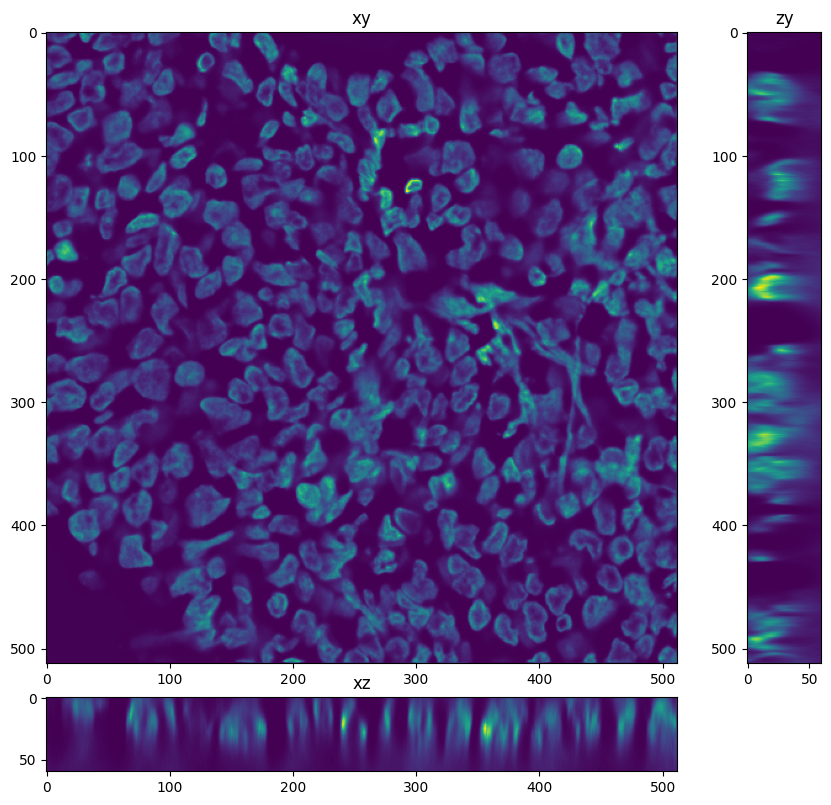

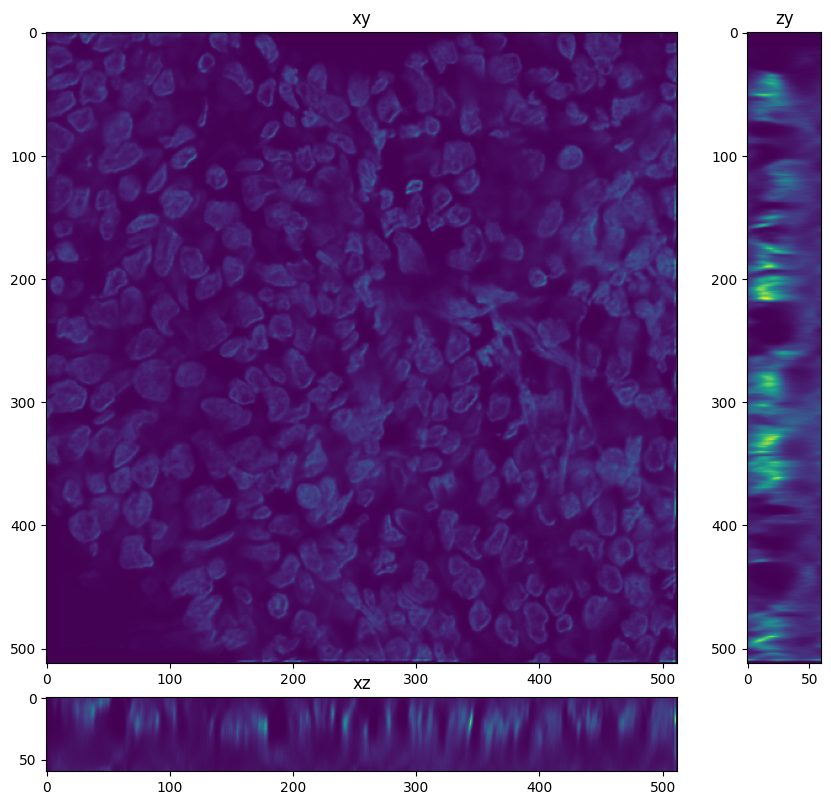

In [4]:
fig=show_xyz_slice(decon_clij2_75,int(im.shape[2]/2), int(im.shape[1]/2), int(im.shape[0]/2),1,3)
fig=show_xyz_slice(decon_rlf_75,int(im.shape[2]/2), int(im.shape[1]/2), int(im.shape[0]/2),1,3)

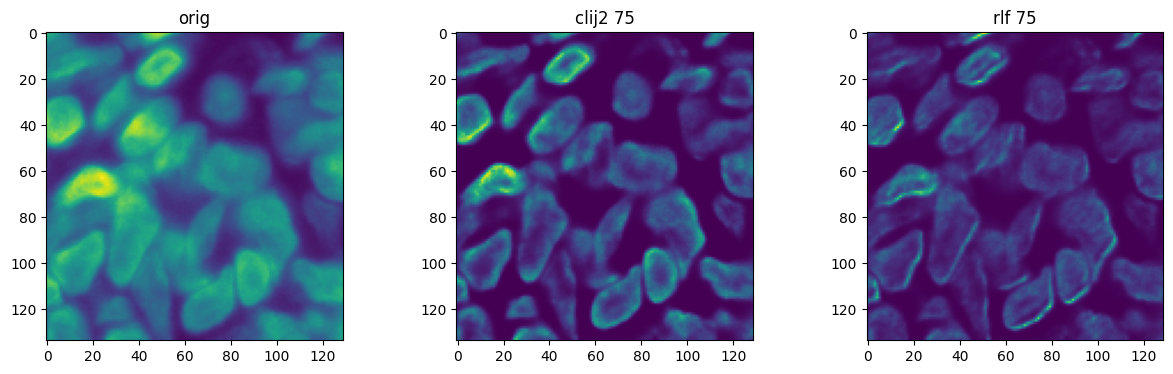

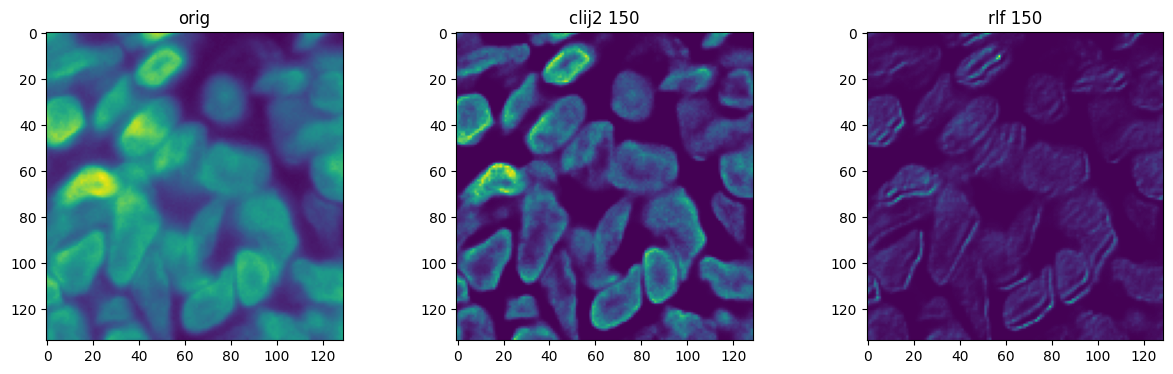

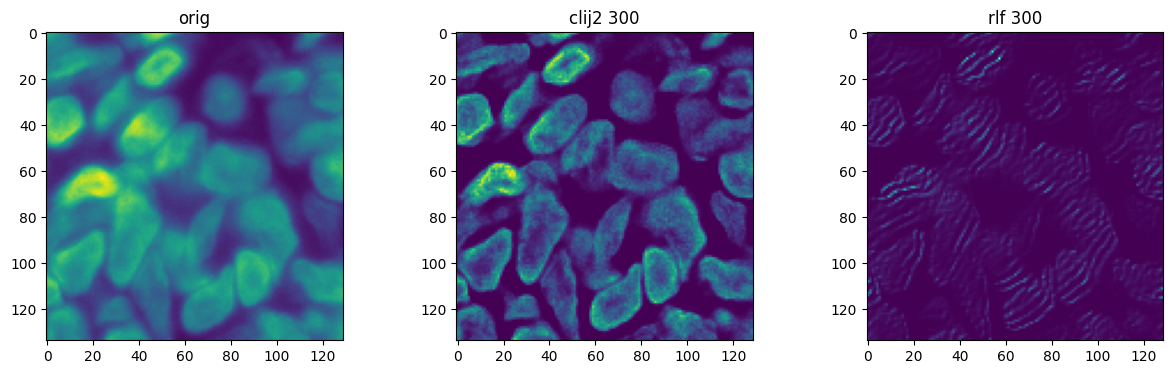

In [5]:
## view decon result using roi from listserv question
from tnia.plotting.plt_helper import imshow2d, imshow_multi2d
import numpy as np
roi = np.s_[6,88:222,62:191]



fig=imshow_multi2d([im[roi],decon_clij2_75[roi], decon_rlf_75[roi]],['orig','clij2 75','rlf 75'],1,3,15)
fig=imshow_multi2d([im[roi],decon_clij2_150[roi], decon_rlf_150[roi]],['orig','clij2 150','rlf 150'],1,3,15)
fig=imshow_multi2d([im[roi],decon_clij2_300[roi], decon_rlf_300[roi]],['orig','clij2 300','rlf 300'],1,3,15)


## View in Napari

In [21]:
import napari
viewer=napari.Viewer()
viewer.add_image(decon_clij2, scale=[3,1,1])

C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\jupyter_client\threaded.py", line 122, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\asyncio\base_events.py", line 623, in ru

<Image layer 'decon_clij2' at 0x1ac80516640>

In [26]:
from skimage.io import imsave

In [34]:
imsave(im_path+'todeconv-rlnc-75.tif',decon_clij2)

In [30]:
imsave(im_path+'todeconv-rlredfish-75.tif',decon_rlf)